In [11]:
import requests
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

base_url = "https://maps.googleapis.com/maps/api/place/textsearch/json"
with open('api.json') as f:
    config = json.load(f)
api_key =config['api_key']

def search_places(api_key, query, location, radius):
    base_url = "https://maps.googleapis.com/maps/api/place/textsearch/json"
    all_places = pd.DataFrame()
    params = {
        "query": query,
        "location": location,
        "radius": radius,
        "key": api_key
    }

    for _ in range(3):

        response = requests.get(base_url, params=params)
        results = response.json()

        all_places = pd.concat([all_places, pd.DataFrame(results['results'])], ignore_index=True)

        if 'next_page_token' not in results:
            break  # Break the loop if no next page token is present

        params['pagetoken'] = results['next_page_token']
        time.sleep(3)  # Sleep to ensure the token is valid for the next request

    return all_places


def get_place_details(place_id, api_key):

    base_url = "https://maps.googleapis.com/maps/api/place/details/json"
    params = {
        "place_id": place_id,
        # "fields": "name,price_level,rating,reviews",  # fields裡面不能加空格
        "key": api_key,
    }

    response = requests.get(base_url, params=params)
    place_details = response.json()

    if response.status_code == 200:
        return place_details
    else:
        print("Failed to retrieve data. Status code:", response.status_code)
        return {}

def get_restaurant_info(api_key,query,location,raidus):

    places = search_places(api_key, query, location, raidus)

    ### 抓店家資料
    restaurant_info = pd.DataFrame(columns=['name',
                                            'place_id',
                                            'price_level',
                                            'rating',
                                            'formatted_address',
                                            'dine_in',
                                            'serves_beer',
                                            'serves_breakfast',
                                            'serves_brunch',
                                            'serves_dinner',
                                            'serves_lunch',
                                            'serves_vegetarian_food',
                                            'serves_wine'
                                            ])
    for index, row in places[['name', 'place_id']].iterrows():

        name = row['name']
        place_id = row['place_id']

        place_details = get_place_details(place_id, api_key)
        if place_details:

            

            price_level = place_details['result'].get('price_level', None)
            rating = place_details['result'].get('rating', None)
            formatted_address = place_details['result'].get('formatted_address', None)
            dine_in = place_details['result'].get('dine_in', None)
            serves_beer = place_details['result'].get('serves_beer', None)
            serves_breakfast = place_details['result'].get('serves_breakfast', None)
            serves_brunch = place_details['result'].get('serves_brunch', None)
            serves_dinner = place_details['result'].get('serves_dinner', None)
            serves_lunch = place_details['result'].get('serves_lunch', None)
            serves_vegetarian_food = place_details['result'].get('serves_vegetarian_food', None)
            serves_wine = place_details['result'].get('serves_wine', None)

            

            # review = []
            # for i in place_details['result']["reviews"][:3]:
            #     review.append(f"rating : {i.get('rating', None)}, review : {i.get('text', None)}")
            # reviews = '\n'.join(review)

            # 放進dataframe裡
            restaurant_info.loc[index] = [name,
                                          place_id,
                                          price_level,
                                          rating,
                                          formatted_address,
                                          dine_in,
                                          serves_beer,
                                          serves_breakfast,
                                          serves_brunch,
                                          serves_dinner,
                                          serves_lunch,
                                          serves_vegetarian_food,
                                          serves_wine]

        else:
            print("No data available.")

    return restaurant_info



""" ----------------------------- Start ---------------------------------- """

def search(query,location):

    restaurants = get_restaurant_info(api_key,query,location,50)
  
    return restaurants

/var/folders/kf/q6p11m4171bcklvlkbcc6_v80000gn/T/ipykernel_89081/3919339181.py:106: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  restaurant_info.loc[index] = [name,


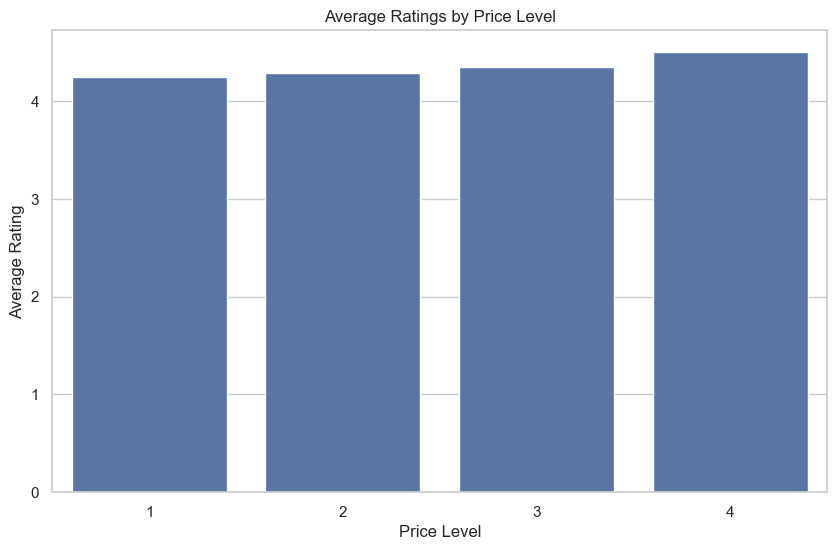

In [12]:

# import requests
# import time
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# base_url = "https://maps.googleapis.com/maps/api/place/textsearch/json"

# def search_places(api_key, query, location, radius):
#     base_url = "https://maps.googleapis.com/maps/api/place/textsearch/json"
    
#     params = {
#         "query": query,
#         "location": location,
#         "radius": radius,
#         "key": api_key
#     }
#     all_places = pd.DataFrame()

#     while True:
#         response = requests.get(base_url, params=params)
#         results = response.json()
#         print(response.status_code)
#         print(response.text)
#         all_places = pd.concat([all_places, pd.DataFrame(results['results'])], ignore_index=True)

#         if 'next_page_token' in results:
#             params['pagetoken'] = results['next_page_token']
#             time.sleep(3)# 給他時間讀
#         else:
#             break
#     print(all_places)
#     return all_places



# def get_place_details(place_id, api_key):

#     base_url = "https://maps.googleapis.com/maps/api/place/details/json"
#     params = {
#         "place_id": place_id,
#         "fields": "name,price_level,rating,reviews",  # fields裡面不能加空格
#         "key": api_key
#     }

#     response = requests.get(base_url, params=params)
#     place_details = response.json()

#     if response.status_code == 200:
#         return place_details
#     else:
#         print("Failed to retrieve data. Status code:", response.status_code)
#         return {}

# def get_restaurant_info(api_key,query,location,raidus):

#     places = search_places(api_key, query, location, raidus)

#     ### 抓店家資料
    # restaurant_info = pd.DataFrame(columns=['name', 'place_id', 'price_level', 'rating', 'reviews'])
    # print(places)
    # for index, row in places[['name', 'place_id']].iterrows():

    #     name = row['name']
    #     place_id = row['place_id']

    #     place_details = get_place_details(place_id, api_key)
    #     if place_details:
    #         print(f"Index: {index}")
    #         # print(place_details['result'])
    #         price_level = place_details['result'].get('price_level', None)
    #         rating = place_details['result'].get('rating', None)
    #         reviews = place_details['result'].get('reviews', None)
            
            

    #         # 放進dataframe裡
    #         restaurant_info.loc[index] = [name, place_id, price_level, rating, reviews]

    #     else:
    #         print("No data available.")

    # return restaurant_info


""" ----------------------------- Start ---------------------------------- """

api_key = config['api_key']
query = "Japanese Restaurant"
location = "40.712776,-74.005974"  # Latitude and longitude of New York City

Japanese_restaurants = get_restaurant_info(api_key,query,location,500)
Japanese_restaurants['country'] = 'japanese'

average_ratings = Japanese_restaurants.groupby('price_level').rating.mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))  # 设置图形大小
bar_plot = sns.barplot(x='price_level', y='rating', data=average_ratings)

plt.title('Average Ratings by Price Level')
plt.xlabel('Price Level')
plt.ylabel('Average Rating')

plt.show()


    

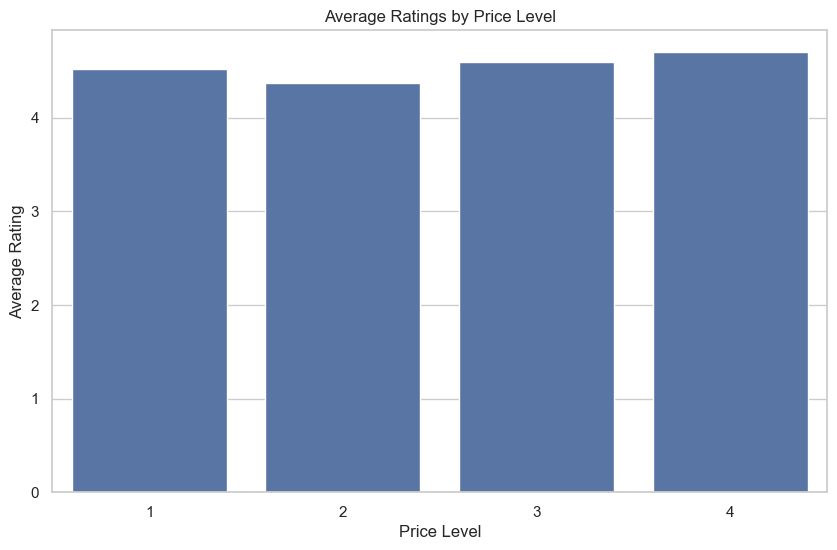

In [13]:
api_key = config['api_key']
query = "Korean Restaurant"
location = "40.712776,-74.005974"  # Latitude and longitude of New York City

Korean_restaurants = get_restaurant_info(api_key,query,location,500)
Korean_restaurants['country'] = 'Korean'
average_ratings = Korean_restaurants.groupby('price_level').rating.mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))  # 设置图形大小
bar_plot = sns.barplot(x='price_level', y='rating', data=average_ratings)

plt.title('Average Ratings by Price Level')
plt.xlabel('Price Level')
plt.ylabel('Average Rating')

plt.show()

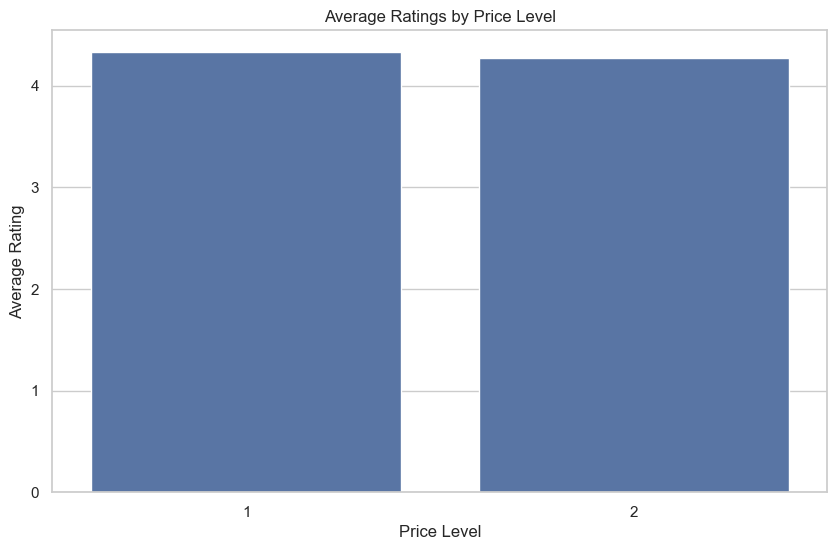

In [14]:
api_key = config['api_key']
query = "Taiwanese Restaurant"
location = "40.712776,-74.005974"  # Latitude and longitude of New York City

Taiwanese_restaurants = get_restaurant_info(api_key,query,location,500)
Taiwanese_restaurants['country'] = 'Taiwanese'

average_ratings = Taiwanese_restaurants.groupby('price_level').rating.mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))  # 设置图形大小
bar_plot = sns.barplot(x='price_level', y='rating', data=average_ratings)

plt.title('Average Ratings by Price Level')
plt.xlabel('Price Level')
plt.ylabel('Average Rating')

plt.show()

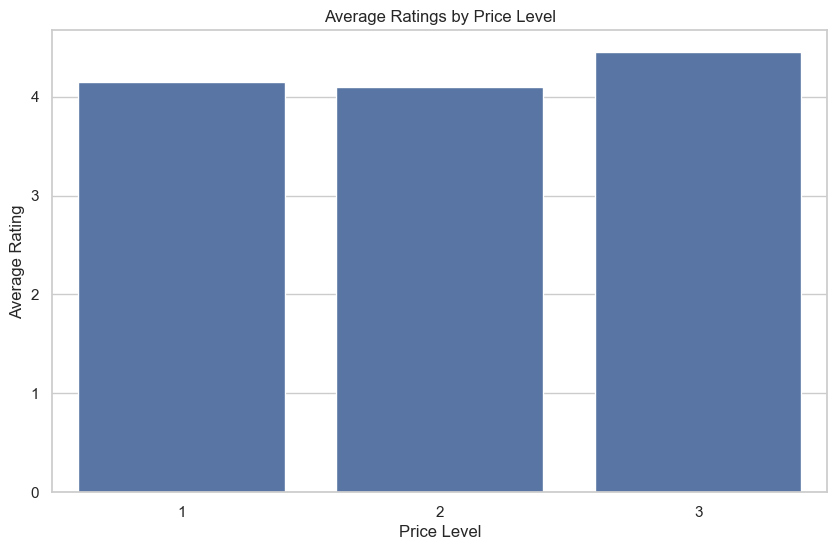

In [15]:
api_key = config['api_key']
query = "China Restaurant"
location = "40.712776,-74.005974"  # Latitude and longitude of New York City

China_restaurants = get_restaurant_info(api_key,query,location,500)
China_restaurants['country'] = 'China'
average_ratings = China_restaurants.groupby('price_level').rating.mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))  # 设置图形大小
bar_plot = sns.barplot(x='price_level', y='rating', data=average_ratings)

plt.title('Average Ratings by Price Level')
plt.xlabel('Price Level')
plt.ylabel('Average Rating')

plt.show()

/var/folders/kf/q6p11m4171bcklvlkbcc6_v80000gn/T/ipykernel_89081/3919339181.py:106: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  restaurant_info.loc[index] = [name,


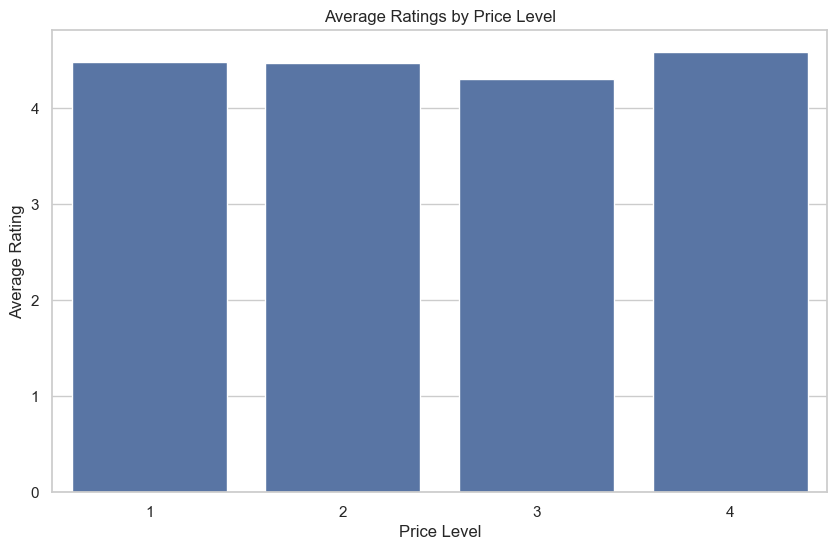

In [16]:
api_key = config['api_key']
query = "United State Restaurant"
location = "40.712776,-74.005974"  # Latitude and longitude of New York City

United_State_restaurants = get_restaurant_info(api_key,query,location,500)
United_State_restaurants['country'] = 'United State'
average_ratings = United_State_restaurants.groupby('price_level').rating.mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))  # 设置图形大小
bar_plot = sns.barplot(x='price_level', y='rating', data=average_ratings)

plt.title('Average Ratings by Price Level')
plt.xlabel('Price Level')
plt.ylabel('Average Rating')

plt.show()

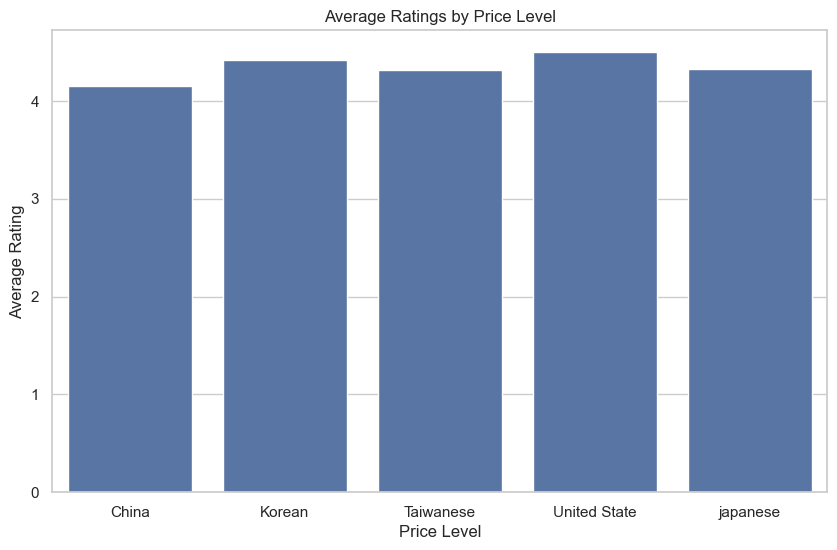

In [17]:
all_restaurant = pd.concat([Japanese_restaurants, Korean_restaurants, Taiwanese_restaurants,China_restaurants,United_State_restaurants], axis=0, ignore_index=True)

all_restaurant['price_level'] = all_restaurant['price_level'].astype('string')
all_restaurant['price_level'] = all_restaurant['price_level'].astype('float')


average_ratings = all_restaurant.groupby('country').rating.mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))  # 设置图形大小
bar_plot = sns.barplot(x='country', y='rating', data=average_ratings)

plt.title('Average Ratings by Price Level')
plt.xlabel('Price Level')
plt.ylabel('Average Rating')

plt.show()


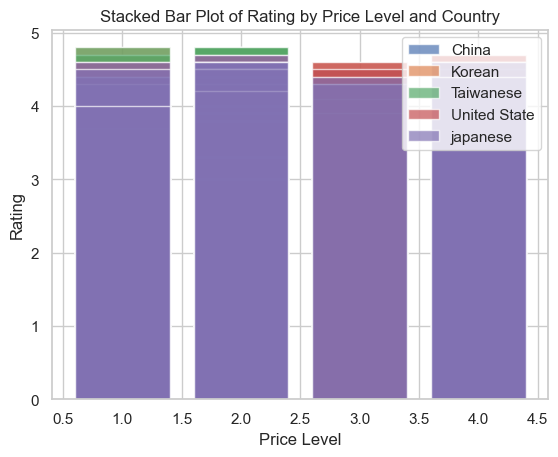

In [18]:
for country, data in all_restaurant.groupby('country'):
    plt.bar(data['price_level'], data['rating'], label=country, alpha=0.7)

plt.xlabel('Price Level')
plt.ylabel('Rating')
plt.title('Stacked Bar Plot of Rating by Price Level and Country')
plt.legend()
plt.grid(True)
plt.show()

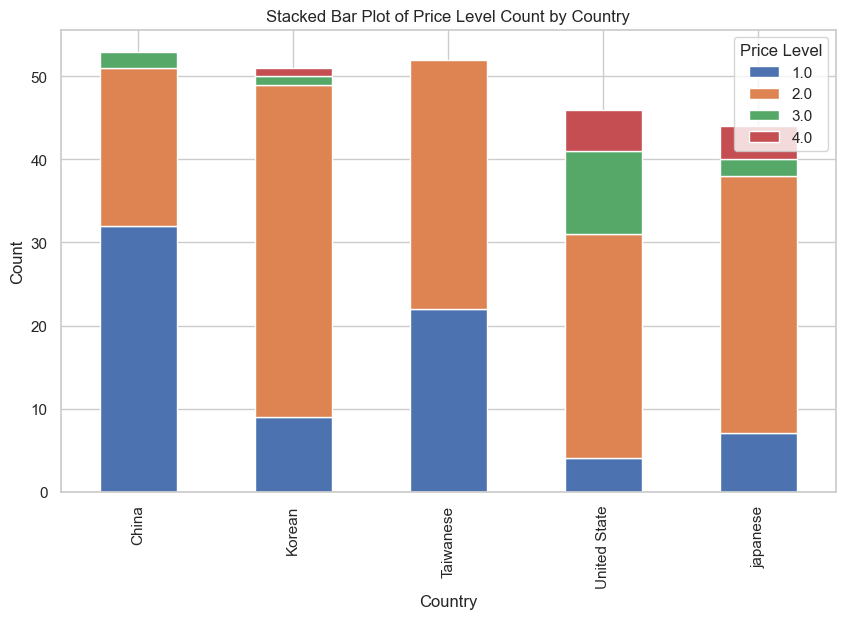

In [19]:
price_counts_by_country = all_restaurant.groupby(['country', 'price_level']).size().unstack(fill_value=0)

# 绘制堆叠条形图
price_counts_by_country.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Price Level Count by Country')
plt.legend(title='Price Level')
plt.grid(True)
plt.show()

In [20]:
# restaurant_info = pd.DataFrame({
#     'name': ['Restaurant 1', 'Restaurant 2', 'Restaurant 3'],
#     'price_level': [1, 2, 3],
#     'rating': [4.5, 3.8, 4.2],
#     'country': ['Japan', 'USA', 'France']
# })

# # 绘制堆叠条形图
# plt.figure(figsize=(10, 6))

# # 对每个国家进行循环，并绘制每个国家的堆叠条形图
# for country, data in restaurant_info.groupby('country'):
#     plt.bar(data['price_level'], data['rating'], label=country, alpha=0.7)

# plt.xlabel('Price Level')
# plt.ylabel('Rating')
# plt.title('Stacked Bar Plot of Rating by Price Level and Country')
# plt.legend()
# plt.grid(True)
# plt.show()

all_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    300 non-null    object 
 1   place_id                300 non-null    object 
 2   price_level             246 non-null    float64
 3   rating                  298 non-null    float64
 4   formatted_address       300 non-null    object 
 5   dine_in                 298 non-null    object 
 6   serves_beer             245 non-null    object 
 7   serves_breakfast        145 non-null    object 
 8   serves_brunch           136 non-null    object 
 9   serves_dinner           295 non-null    object 
 10  serves_lunch            286 non-null    object 
 11  serves_vegetarian_food  168 non-null    object 
 12  serves_wine             236 non-null    object 
 13  country                 300 non-null    object 
dtypes: float64(2), object(12)
memory usage: 32